From: https://github.com/howisonlab/dwts_dataset/tree/main/dwts_dataset

In [2]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
celebs_df = pd.read_csv('celebrities.csv')
couples_df = pd.read_csv('couples.csv')
judges_df = pd.read_csv('judges.csv')
performances_df = pd.read_csv('performances.csv')
primary_dance_styles_df = pd.read_csv('primary_dance_styles.csv')
professionals_df = pd.read_csv('professionals.csv')
scores_df = pd.read_csv('scores.csv')
week_themes_df = pd.read_csv('week_themes.csv')

In [4]:
# combine into one dataframe
df_merge = pd.merge(performances_df, couples_df, on='couple_id', how='left').\
        merge(primary_dance_styles_df, on='primary_dance_style_id', how='left').\
        merge(professionals_df, on='professional_id', how='left').\
        merge(scores_df, on='performance_id', how='left').\
        merge(judges_df, on='judge_id', how='left').\
        merge(week_themes_df, on='week_theme_id', how='left')

The only dataframe that I could not combine with a foreign key was the `celebs_df`. 

We're focused on Judges scores, so let's see how they have changed based on different variables.

Before I do that, I'll only keep five judges:
1. Carrie Ann Inaba
2. Len Goodman
3. Bruno Tonioli
4. Julianne Hough
5. Derek Hough

In [7]:
# focus only on key judges
df = df_merge.loc[df_merge['judge'].isin(['Carrie Ann Inaba', 'Len Goodman', 'Bruno Tonioli', 'Julianne Hough', 'Derek Hough'])].copy()

In [8]:
# modify judge names for simpler graphics
df['judge'] = df['judge'].astype(str)
df['judge'].replace({
    'Carrie Ann Inaba':'CA',
    'Len Goodman':'LG',
    'Bruno Tonioli':'BT',
    'Julianne Hough':'JH',
    'Derek Hough':'DH'
})

0       CA
1       LG
2       BT
3       CA
4       LG
        ..
9728    LG
9729    BT
9730    CA
9731    LG
9732    BT
Name: judge, Length: 9468, dtype: object

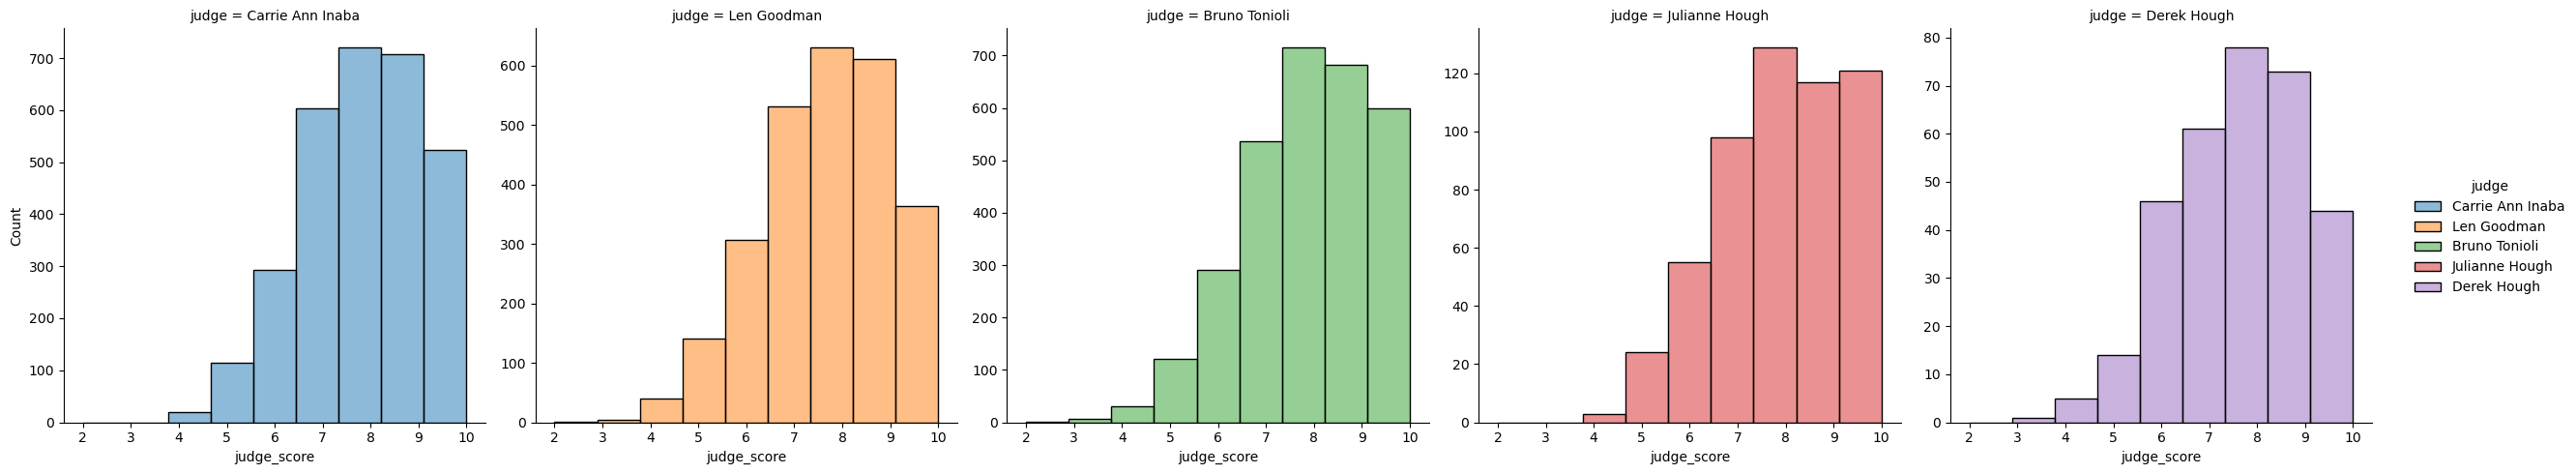

In [168]:
sns.displot(data=df, x='judge_score', bins=9, hue='judge', col='judge', facet_kws={'sharey':False, 'sharex':False}, kind='hist')
plt.show()

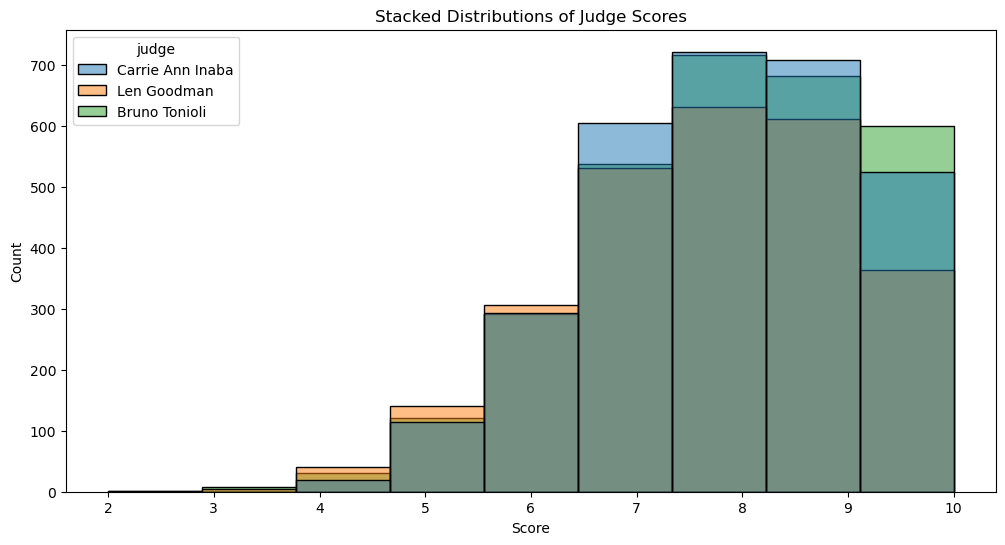

In [134]:
plt.figure(figsize=(12,6))

subset = df[df['judge'].isin([
    'Carrie Ann Inaba',
    'Bruno Tonioli',
    'Len Goodman'
])]

sns.histplot(data=subset, x='judge_score', bins=9, hue='judge')
plt.title('Stacked Distributions of Judge Scores')
plt.xlabel('Score')

plt.show()

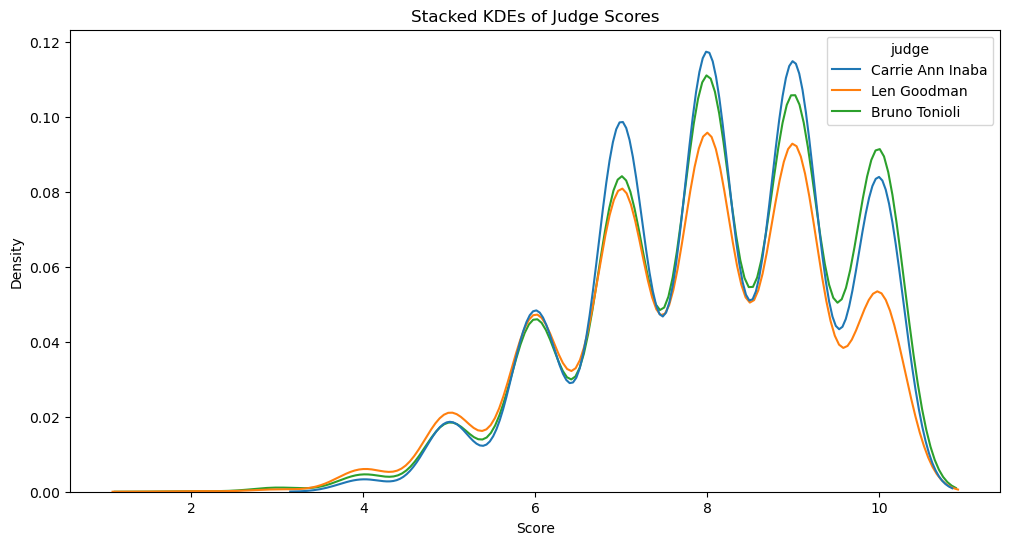

In [152]:
plt.figure(figsize=(12,6))

subset = df[df['judge'].isin([
    'Carrie Ann Inaba',
    'Bruno Tonioli',
    'Len Goodman'
])]

sns.kdeplot(data=subset, x='judge_score', hue='judge')
plt.title('Stacked KDEs of Judge Scores')
plt.xlabel('Score')

plt.show()

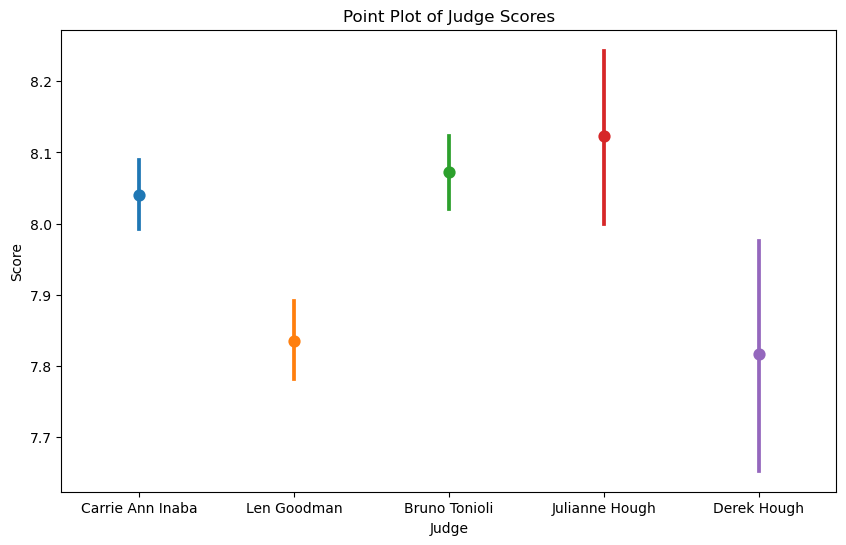

In [176]:
plt.figure(figsize=(10,6))
sns.pointplot(
    data=df,
    x='judge',
    y='judge_score', hue='judge', errorbar=('ci', 95)
)
plt.title("Point Plot of Judge Scores")
plt.xlabel('Judge')
plt.ylabel('Score')

plt.show()

It looks like Len and Derek share very similar scoring distributions.
Bruno's and Carrie Ann's plots look similar with Bruno giving more 10s than 9s as compared to Carrie Ann.
Julianne's scoring erred towards the higher end of the spectrum, with only her having 10 as her second most frequent score.

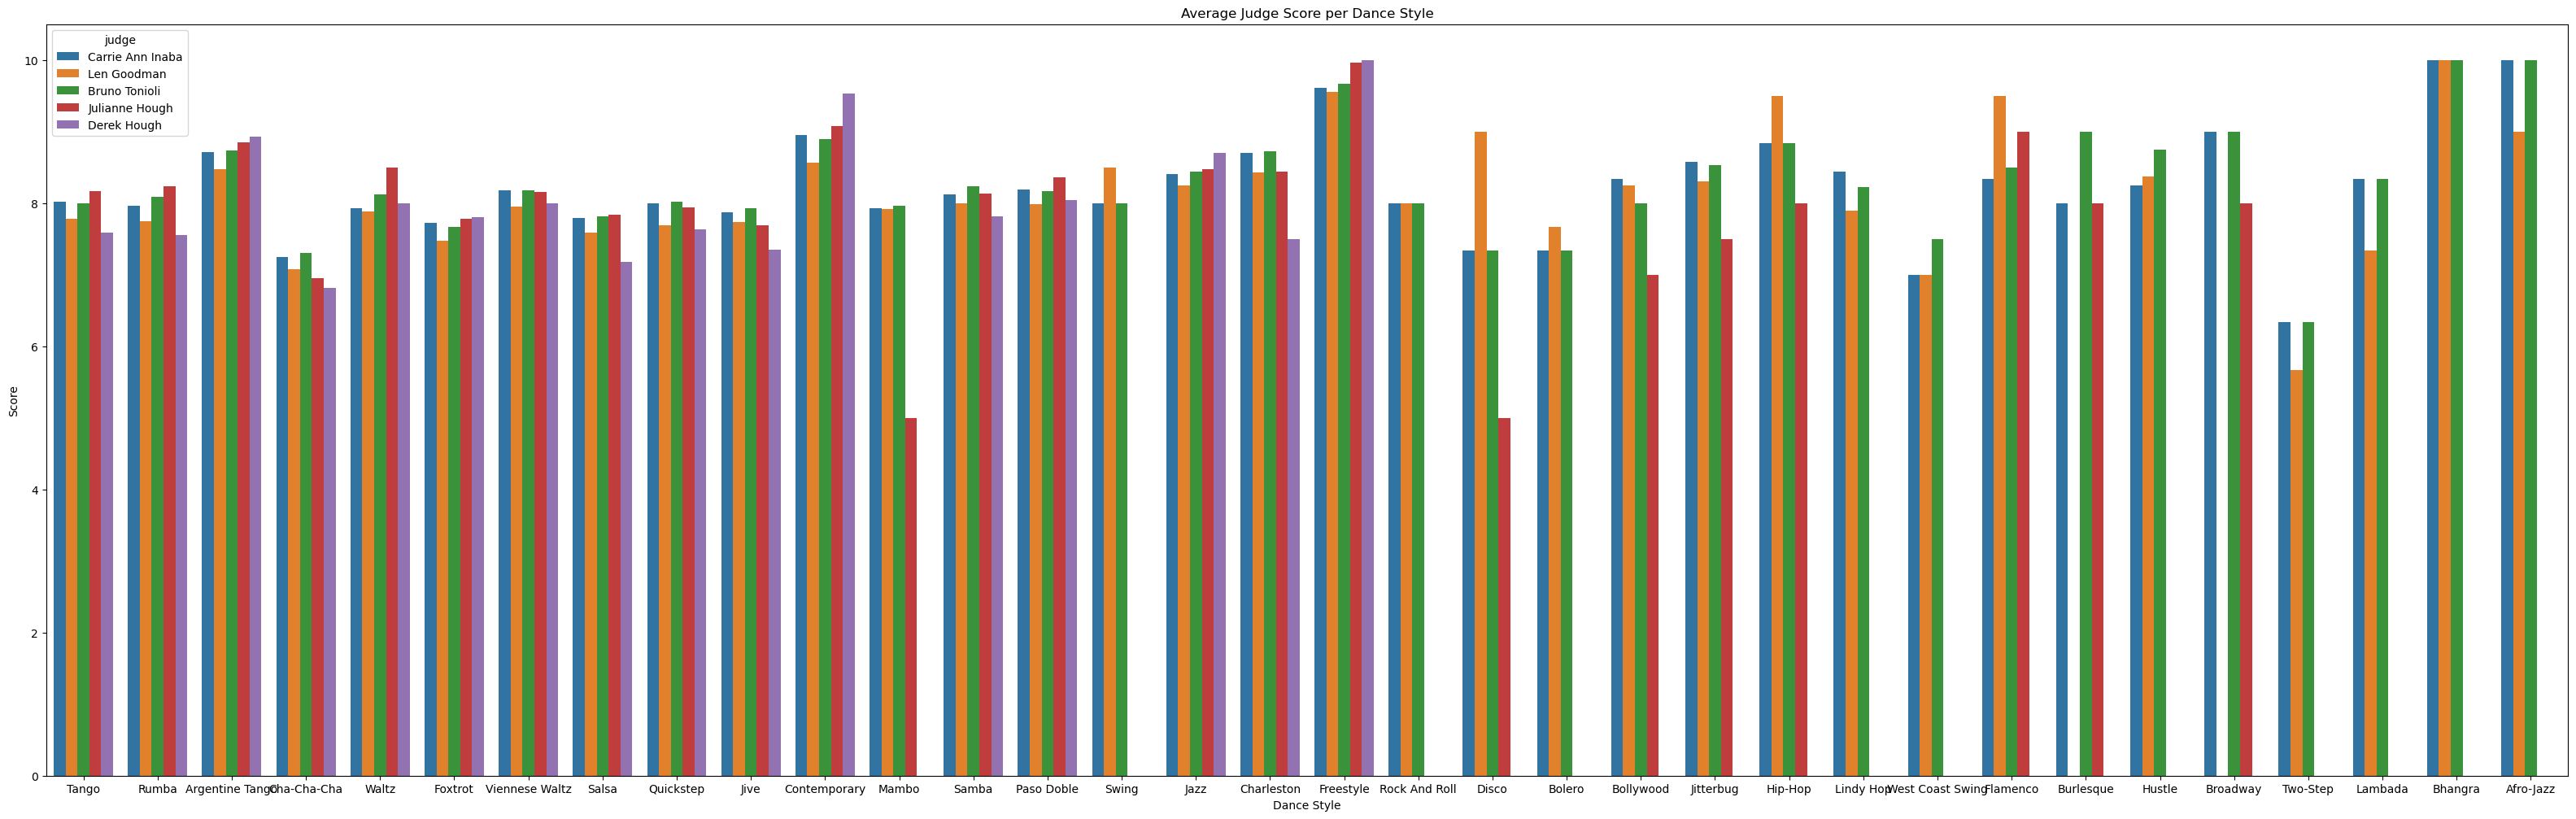

In [116]:
plt.figure(figsize=(40, 12))
sns.barplot(data = df, x = 'primary_dance_style', y = 'judge_score',
           hue = 'judge', errorbar=None)
plt.title('Average Judge Score per Dance Style')
plt.xlabel('Dance Style')
plt.ylabel('Score')

plt.show()

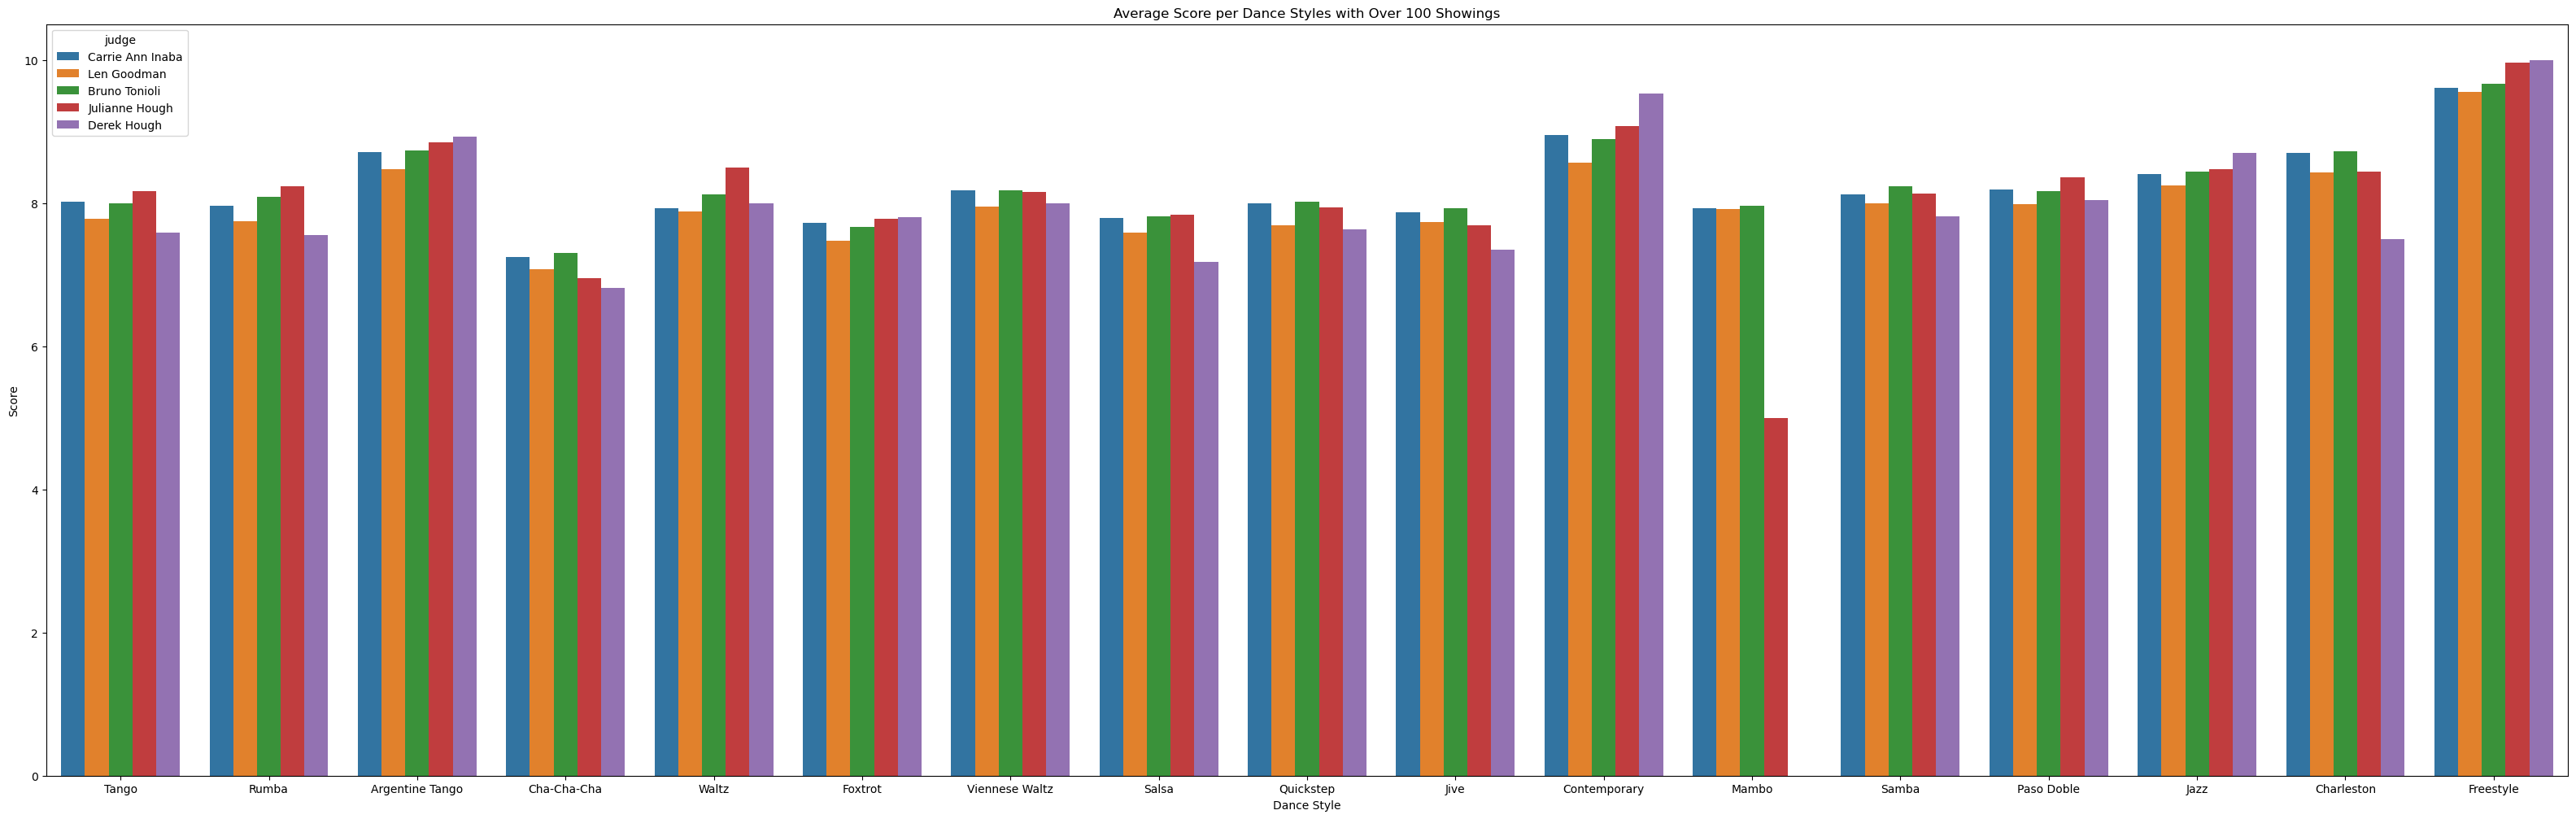

In [184]:
plt.figure(figsize=(40, 12))

valid = df['primary_dance_style'].value_counts()
df_dance_100 = df[df['primary_dance_style'].isin(valid[valid >= 100].index)]

sns.barplot(data = df_dance_100, x = 'primary_dance_style', y = 'judge_score',
           hue = 'judge', errorbar=None)
plt.title('Average Score per Dance Styles with Over 100 Showings')
plt.xlabel('Dance Style')
plt.ylabel('Score')

plt.show()

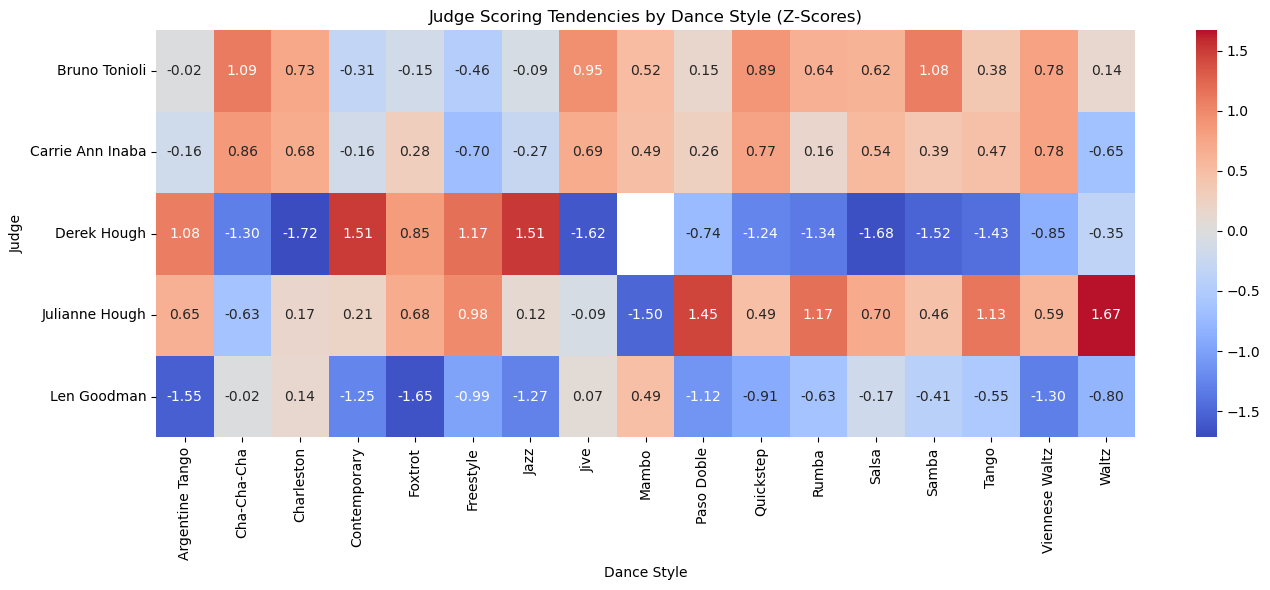

In [192]:
# Step 1: Compute mean score per judge per style
style_means = df_dance_100.groupby(['judge', 'primary_dance_style'])['judge_score'].mean().reset_index()

# Step 2: Z-score normalize **within each dance style**
# (compare judges against each other for the same style)
style_means['z_score'] = style_means.groupby('primary_dance_style')['judge_score'].transform(
    lambda x: (x - x.mean()) / x.std()
)

heat_df = style_means.pivot(index='judge',
                            columns='primary_dance_style',
                            values='z_score')

plt.figure(figsize=(14, 6))

sns.heatmap(
    heat_df,
    cmap='coolwarm',
    center=0,        # ensure red = above avg, blue = below avg
    annot=True,      # optional: show numeric z-scores
    fmt=".2f"
)

plt.title("Judge Scoring Tendencies by Dance Style (Z-Scores)")
plt.xlabel("Dance Style")
plt.ylabel("Judge")
plt.tight_layout()

plt.show()

Despite her high scoring, Julianne has significantly lower average scores for the Mambo.

Len scored Disco a point higher on average than the other judges.

The rest of the scoring plots per style saw variations amongst judges, but nothing significant.

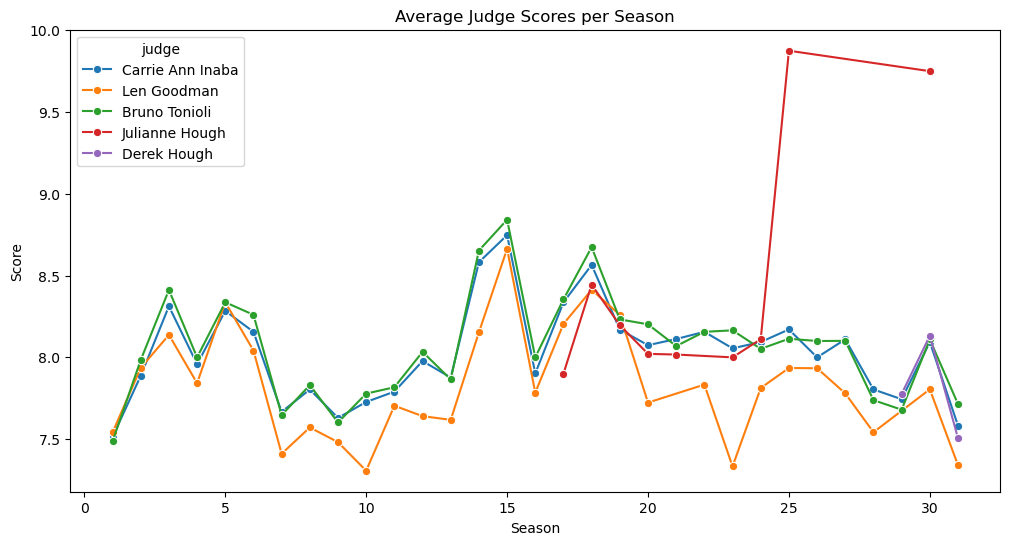

In [114]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='season', y='judge_score', hue='judge', marker='o', errorbar=None)
plt.title('Average Judge Scores per Season')
plt.xlabel('Season')
plt.ylabel('Score')

plt.show()

Scores across seasons show that on average, the judges vote similarly.

Spikes with Julianne in seasons 25 and 30 come from guest judging/filling in for an episode.

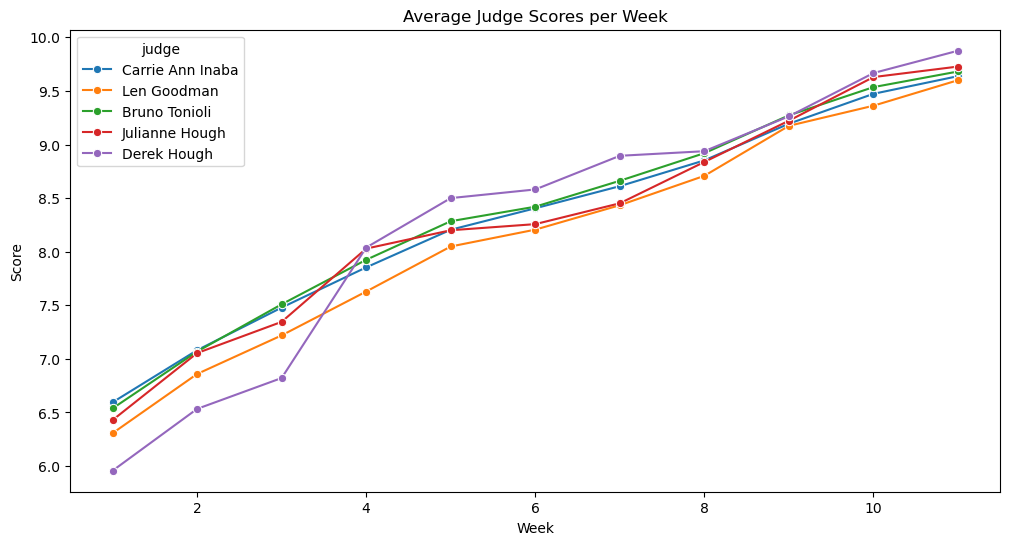

In [112]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='week', y='judge_score', hue='judge', marker='o', errorbar=None)
plt.title('Average Judge Scores per Week')
plt.xlabel('Week')
plt.ylabel('Score')

plt.show()

In the first few weeks, Derek tends to score slighlt lower than the other judges, but then evens out as the seasons progress.

Really, just want to see what Carrie Ann is up to vs the others.

In [83]:
df_ca = df.loc[df.judge == 'Carrie Ann Inaba'].drop(columns='judge_id').copy()
dfa = df.loc[df.judge != 'Carrie Ann Inaba'].drop(columns='judge_id').copy()

## Carrie Ann

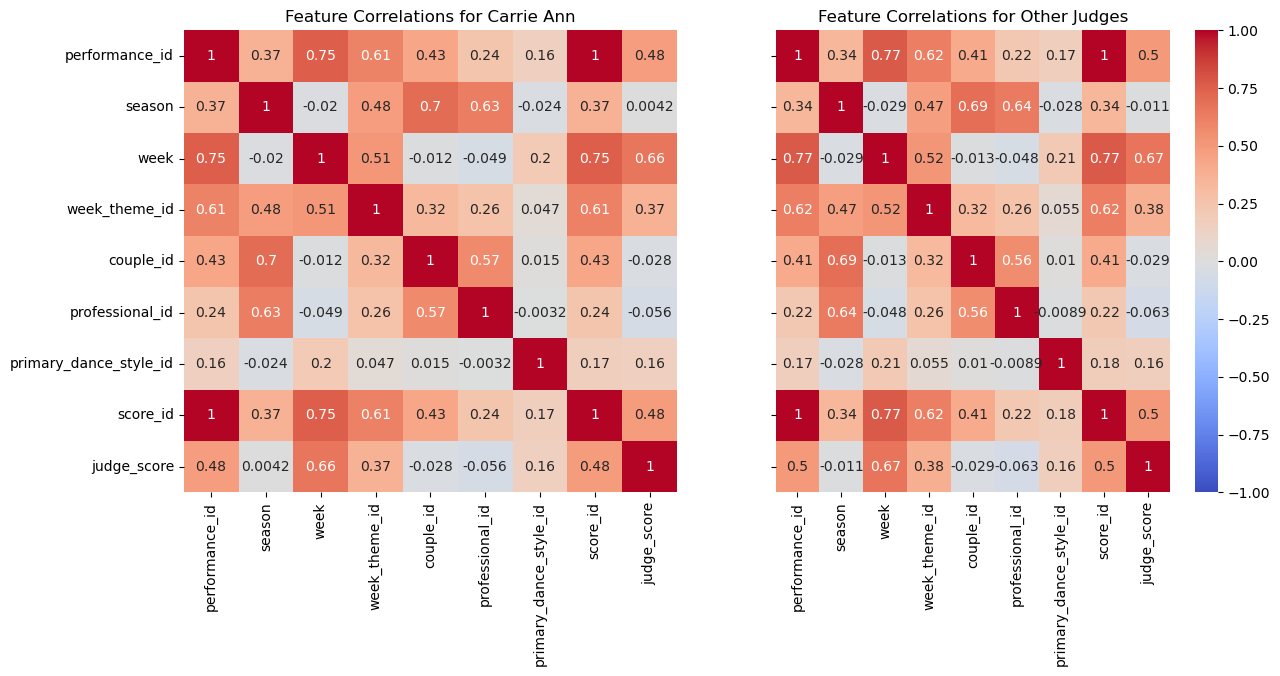

In [218]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# First heatmap (Carrie Ann), create the colorbar here
hm1 = sns.heatmap(
    df_ca.select_dtypes(include=['float64', 'int64']).corr(),
    cmap='coolwarm',
    annot=True,
    vmin=-1, vmax=1,
    ax=ax[0],
    cbar=False,
)
ax[0].set_title('Feature Correlations for Carrie Ann')

# Second heatmap (Others), NO colorbar here
hm2 = sns.heatmap(
    dfa.select_dtypes(include=['float64', 'int64']).corr(),
    cmap='coolwarm',
    annot=True,
    vmin=-1, vmax=1,
    ax=ax[1],
    cbar=True)
ax[1].set_title('Feature Correlations for Other Judges')


plt.show()

In [262]:
# Import modules
import statsmodels.formula.api as smf

# Make Carrie Ann the baseline judge
formula = (
    'judge_score ~ '
    'C(judge, Treatment(reference="Carrie Ann Inaba")) + '
    'C(primary_dance_style) + '
    'season + '
    'week'
)

# Fit the model
model = smf.ols(formula=formula, data=df).fit()

# Extract coefficient table
results = pd.DataFrame({
    "Coefficient": np.round(model.params, 5),
    "p-value": np.round(model.pvalues, 5)
})

results.head()

,Coefficient,p-value
Intercept,6.96645,0.00000
"C(judge, Treatment(reference=""Carrie Ann Inaba""))[T.Bruno Tonioli]",0.03199,0.24885
"C(judge, Treatment(reference=""Carrie Ann Inaba""))[T.Derek Hough]",-0.06851,0.29443
"C(judge, Treatment(reference=""Carrie Ann Inaba""))[T.Julianne Hough]",-0.03616,0.47214
"C(judge, Treatment(reference=""Carrie Ann Inaba""))[T.Len Goodman]",-0.18850,0.00000


In [92]:
df_wide = (df.pivot(index=['performance_id', 'season', 'week', 'couple_id', 
                  'professional_id', 'primary_dance_style_id', 'week_theme_id'],
           columns='judge',
           values='judge_score').reset_index().drop(columns=['Derek Hough','Julianne Hough']).dropna())
df_wide.columns.name = None


df_wide.head()

,performance_id,season,week,couple_id,professional_id,primary_dance_style_id,week_theme_id,Bruno Tonioli,Carrie Ann Inaba,Len Goodman
0,0,2,1,19,4,4,3,6.0,7.0,5.0
1,1,7,1,20,14,4,3,6.0,6.0,6.0
2,2,6,1,21,15,4,3,5.0,5.0,6.0
3,3,5,1,22,5,4,3,7.0,7.0,7.0
4,4,4,1,23,8,4,3,7.0,7.0,7.0


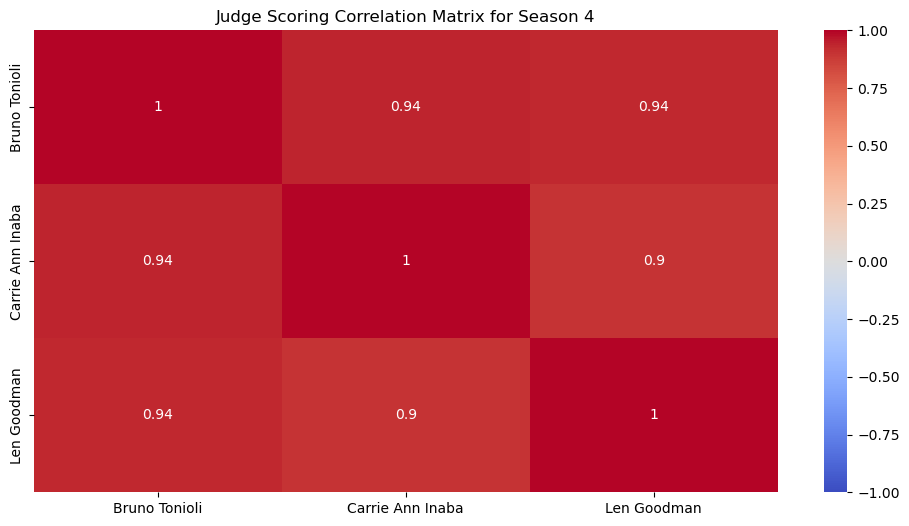

In [94]:
judge_cols = ['Bruno Tonioli', 'Carrie Ann Inaba', 'Len Goodman']
subset = df_wide.loc[df_wide['season'] == 4, judge_cols]

plt.subplots(figsize=(12,6))
sns.heatmap(subset.corr(),
            annot=True, cmap='coolwarm',
           vmin=-1, vmax=1, center=0)
plt.title("Judge Scoring Correlation Matrix for Season 4")
plt.show()

In [96]:
# Create an empty list to store results
corr_list = []

for i in sorted(df_wide['season'].unique()):
    subset = df_wide.loc[df_wide['season'] == i, judge_cols].dropna()
    corr_matrix = subset.corr()
    corr_list.append({
        'season': i,
        'Carrie Ann - Bruno': corr_matrix.loc['Carrie Ann Inaba', 'Bruno Tonioli'],
        'Carrie Ann - Len': corr_matrix.loc['Carrie Ann Inaba', 'Len Goodman'],
        'Bruno – Len': corr_matrix.loc['Bruno Tonioli', 'Len Goodman']
    })

# Combine results into a DataFrame
df_corr = pd.DataFrame(corr_list)
df_corr.head()

,season,Carrie Ann - Bruno,Carrie Ann - Len,Bruno – Len
0,1,0.733264,0.749784,0.888748
1,2,0.882039,0.855398,0.940303
2,3,0.864970,0.852909,0.890279
3,4,0.938349,0.901712,0.936679
4,5,0.900589,0.868086,0.912647


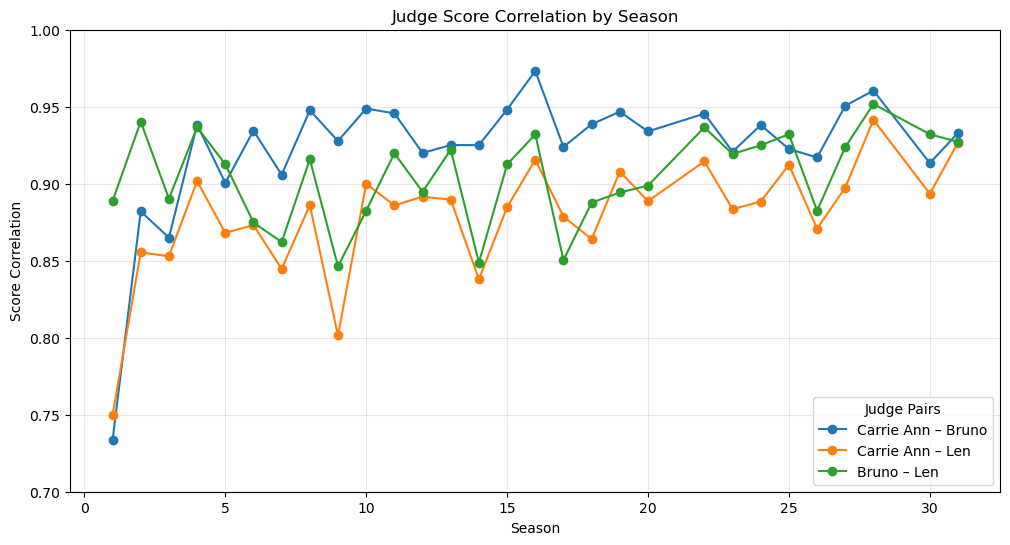

In [102]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(df_corr['season'], df_corr['Carrie Ann - Bruno'], 
         marker='o', label='Carrie Ann – Bruno')
plt.plot(df_corr['season'], df_corr['Carrie Ann - Len'], 
         marker='o', label='Carrie Ann – Len')
plt.plot(df_corr['season'], df_corr['Bruno – Len'], 
         marker='o', label='Bruno – Len')

plt.legend(title='Judge Pairs')
plt.title('Judge Score Correlation by Season')
plt.xlabel('Season')
plt.ylabel('Score Correlation')
plt.ylim(0.7, 1)
plt.grid(True, alpha=0.3)

plt.show()

In [274]:
# Copy to avoid modifying original
df_check = df_wide.copy()

# Compute the average of the other judges
df_check["bt_lg_judges_avg"] = df_check[["Bruno Tonioli", "Len Goodman"]].mean(axis=1)
df_check["ca_lg_judges_avg"] = df_check[["Carrie Ann Inaba", "Len Goodman"]].mean(axis=1)
df_check["bt_ca_judges_avg"] = df_check[["Bruno Tonioli", "Carrie Ann Inaba"]].mean(axis=1)

# Compute the other judges' deviation from the target judge
df_check["carrie_ann_deviation"] = df_check["Carrie Ann Inaba"] - df_check["bt_lg_judges_avg"]
df_check["bruno_deviation"] = df_check["Bruno Tonioli"] - df_check["ca_lg_judges_avg"]
df_check["len_deviation"] = df_check["Len Goodman"] - df_check["bt_ca_judges_avg"]

# Filter rows where deviation is >= +2 or <= -2
df_ca_outliers = df_check[ df_check["carrie_ann_deviation"].abs() >= 2 ]
df_bt_outliers = df_check[ df_check["bruno_deviation"].abs() >= 2 ]
df_lg_outliers = df_check[ df_check["len_deviation"].abs() >= 2 ]

# Print results
print('# of Carrie Ann outliers: ', df_ca_outliers.shape[0])
print('# of Bruno outliers: ', df_bt_outliers.shape[0])
print('# of Len outliers: ', df_lg_outliers.shape[0])

# of Carrie Ann outliers:  16
# of Bruno outliers:  4
# of Len outliers:  47
